<a href="https://colab.research.google.com/github/tiffanyformosa/kdg/blob/forward_transfer/docs/tutorials/KDN_PROG_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install libraries

!rm -r kdg
!git clone --branch forward_transfer https://github.com/tiffanyformosa/kdg
!ls
!pip install kdg/.

In [ ]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from kdg.utils import *

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Function

In [ ]:
def plot_error_and_eff(n1s, n2s, mean_error, mean_te, TASK1, TASK2):
    """
    A function that plots the generalization error and
    transfer efficiency for the xor-nxor-rxor experiment
    Parameters
    ----------
    n1s : range(int)
        Array of sample sizes tested for the first learner.
    n2s : range(int)
        Array of sample sizes tested for the second learner.
    mean_error : np.array
        Array of generalization errors.
    mean_te : np.array
        Array of transfer efficiencies.
    task1 : str
        String of the name of the first task.
    task2 : str
        String of the name of the second task.
    """

    ns = np.concatenate((n1s, n2s + n1s[-1]))
    ls = ["-", "--"]

    ################################
    # Plots of Generalization Error
    ################################
    algorithms = [f"Single Task {TASK1}",
                  f"Transfer {TASK1}",
                  f"Single Task {TASK2}",
                  f"Transfer {TASK2}",
                  f"Naive {TASK1}",
                  f"Naive {TASK2}"]

    fontsize = 30
    labelsize = 28

    colors = sns.color_palette("Set1", n_colors=2)

    fig = plt.figure(constrained_layout=True, figsize=(21, 14))
    gs = fig.add_gridspec(14, 21)
    ax1 = fig.add_subplot(gs[7:, :6])
    ax1.plot(
        ns,
        mean_error[1],
        label=algorithms[1],
        c=colors[0],
        ls=ls[np.sum(1 > 1).astype(int)],
        lw=3,
    )
    ax1.plot(
        ns,
        mean_error[0],
        label=algorithms[0],
        c="g",
        ls=ls[np.sum(1 > 1).astype(int)],
        lw=3,
    )

    ax1.set_ylabel("Generalization Error (%s)" % (TASK1), fontsize=fontsize)
    ax1.legend(loc="upper left", fontsize=20, frameon=False)
    ax1.set_xlabel("Total Sample Size", fontsize=fontsize)
    ax1.tick_params(labelsize=labelsize)
    ax1.set_yscale("log")
    ax1.yaxis.set_major_formatter(ScalarFormatter())
    ax1.set_yticks([0.1, 0.3, 0.5])
    ax1.set_xticks([n1s[0], n1s[-1], ns[-1]])
    ax1.axvline(x=n1s[-1], c="blue", linewidth=1.5, linestyle="dashed")
    ax1.set_title(f"{TASK1}", fontsize=30)

    right_side = ax1.spines["right"]
    right_side.set_visible(False)
    top_side = ax1.spines["top"]
    top_side.set_visible(False)

    ax1.text(int(0.5*n1s[-1]), np.mean(ax1.get_ylim()), "%s" % (TASK1), fontsize=26)
    ax1.text(int(1.5*n1s[-2]), np.mean(ax1.get_ylim()), "%s" % (TASK2), fontsize=26)

    ##############

    ax1 = fig.add_subplot(gs[7:, 7:13])

    ax1.plot(
        ns[len(n1s) :],
        mean_error[3, len(n1s) :],
        label=algorithms[3],
        c=colors[0],
        lw=3,
    )
    ax1.plot(
        ns[len(n1s) :], mean_error[2, len(n1s) :], label=algorithms[2], c="g", lw=3
    )

    ax1.set_ylabel("Generalization Error (%s)" % (TASK2), fontsize=fontsize)
    ax1.legend(loc="upper left", fontsize=20, frameon=False)
    ax1.set_xlabel("Total Sample Size", fontsize=fontsize)
    ax1.tick_params(labelsize=labelsize)
    ax1.set_yscale("log")
    ax1.yaxis.set_major_formatter(ScalarFormatter())
    ax1.set_yticks([0.1, 0.3, 0.5])
    ax1.set_xticks([n1s[0], n1s[-1], ns[-1]])
    ax1.axvline(x=n1s[-1], c="blue", linewidth=1.5, linestyle="dashed")

    right_side = ax1.spines["right"]
    right_side.set_visible(False)
    top_side = ax1.spines["top"]
    top_side.set_visible(False)

    ax1.text(int(0.5*n1s[-1]), np.mean(ax1.get_ylim()), "%s" % (TASK1), fontsize=26)
    ax1.text(int(1.5*n1s[-2]), np.mean(ax1.get_ylim()), "%s" % (TASK2), fontsize=26)

    ax1.set_title(f"{TASK2}", fontsize=30)

    ################################
    # Plots of Transfer Efficiency
    ################################

    algorithms = ["KDN BTE", "KDN FTE", "Naive BTE", "Naive FTE"]

    ax1 = fig.add_subplot(gs[7:, 14:])

    ax1.plot(ns, mean_te[0], label=algorithms[0], c=colors[0], ls=ls[0], lw=3)
    ax1.plot(
        ns[len(n1s) :],
        mean_te[1, len(n1s) :],
        label=algorithms[1],
        c=colors[0],
        ls=ls[1],
        lw=3,
    )
    ax1.plot(ns, mean_te[2], label=algorithms[2], c="g", ls=ls[0], lw=3)
    ax1.plot(
        ns[len(n1s) :],
        mean_te[3, len(n1s) :],
        label=algorithms[3],
        c="g",
        ls=ls[1],
        lw=3,
    )

    ax1.set_ylabel(
        "log Forward/Backward \n Transfer Efficiency (FTE/BTE)", fontsize=fontsize
    )
    ax1.legend(loc="lower left", fontsize=20, frameon=False)
    ax1.set_yticks([0.2, 0.6, 1, 1.2])
    ax1.set_ylim(0.2, 1.2)
    ax1.set_xlabel("Total Sample Size", fontsize=fontsize)
    log_lbl = np.round(np.log([0.2, 0.6, 1, 1.2]), 2)
    labels = [item.get_text() for item in ax1.get_yticklabels()]

    for ii, _ in enumerate(labels):
        labels[ii] = str(log_lbl[ii])

    ax1.set_yticklabels(labels)
    ax1.tick_params(labelsize=labelsize)
    ax1.set_xticks([n1s[0], n1s[-1], ns[-1]])
    ax1.axvline(x=n1s[-1], c="blue", linewidth=1.5, linestyle="dashed")
    right_side = ax1.spines["right"]
    right_side.set_visible(False)
    top_side = ax1.spines["top"]
    top_side.set_visible(False)
    ax1.hlines(1, 50, 200, colors="gray", linestyles="dashed", linewidth=1.5)

    ax1.text(int(0.5*n1s[-1]), np.mean(ax1.get_ylim()), "%s" % (TASK1), fontsize=26)
    ax1.text(int(1.5*n1s[-2]), np.mean(ax1.get_ylim()), "%s" % (TASK2), fontsize=26)

    colors = sns.color_palette("Dark2", n_colors=2)

    X, Y = generate_gaussian_parity(n1s[-1], angle_params=0)
    Z, W = generate_gaussian_parity(n2s[-1], angle_params=np.pi / 2)

    ax = fig.add_subplot(gs[:6, 4:10])
    clr = [colors[i] for i in Y]
    ax.scatter(X[:, 0], X[:, 1], c=clr, s=50)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Gaussian XOR", fontsize=30)

    ax.axis("off")

    colors = sns.color_palette("Dark2", n_colors=2)

    ax = fig.add_subplot(gs[:6, 11:16])
    clr = [colors[i] for i in W]
    ax.scatter(Z[:, 0], Z[:, 1], c=clr, s=50)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Gaussian XNOR", fontsize=30)
    ax.axis("off")

## Results

###Bagging forward transfer XNOR

task1
task2
mean_error
mean_te


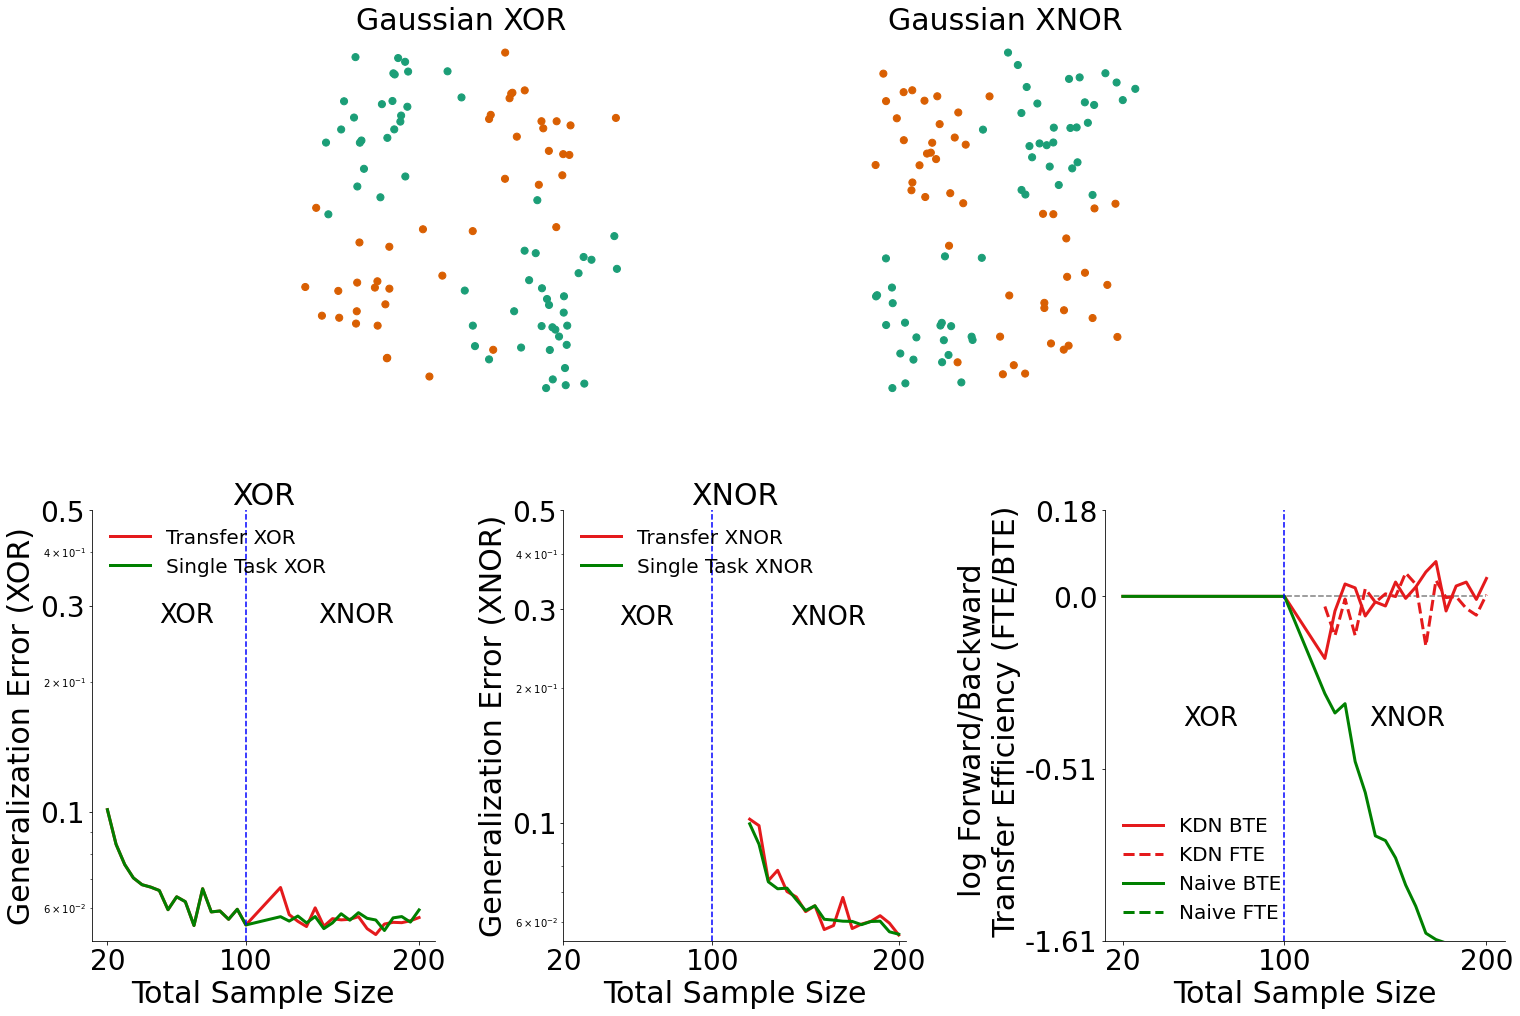

In [ ]:
# plot data
%matplotlib inline

task2_id = "xnor"
data = np.load(f'/content/gdrive/My Drive/kdn_proglearnfig_{task2_id}_bagged.npz')
for k in data.keys():
    print(k)

n_t1 = data['task1']
n_t2 = data['task2']
mean_error = data['mean_error']
mean_te = data['mean_te']

plot_error_and_eff(n_t1, n_t2, mean_error, mean_te, "XOR", "XNOR")

### XNOR 100 generated transfer data points

task1
task2
mean_error
mean_te


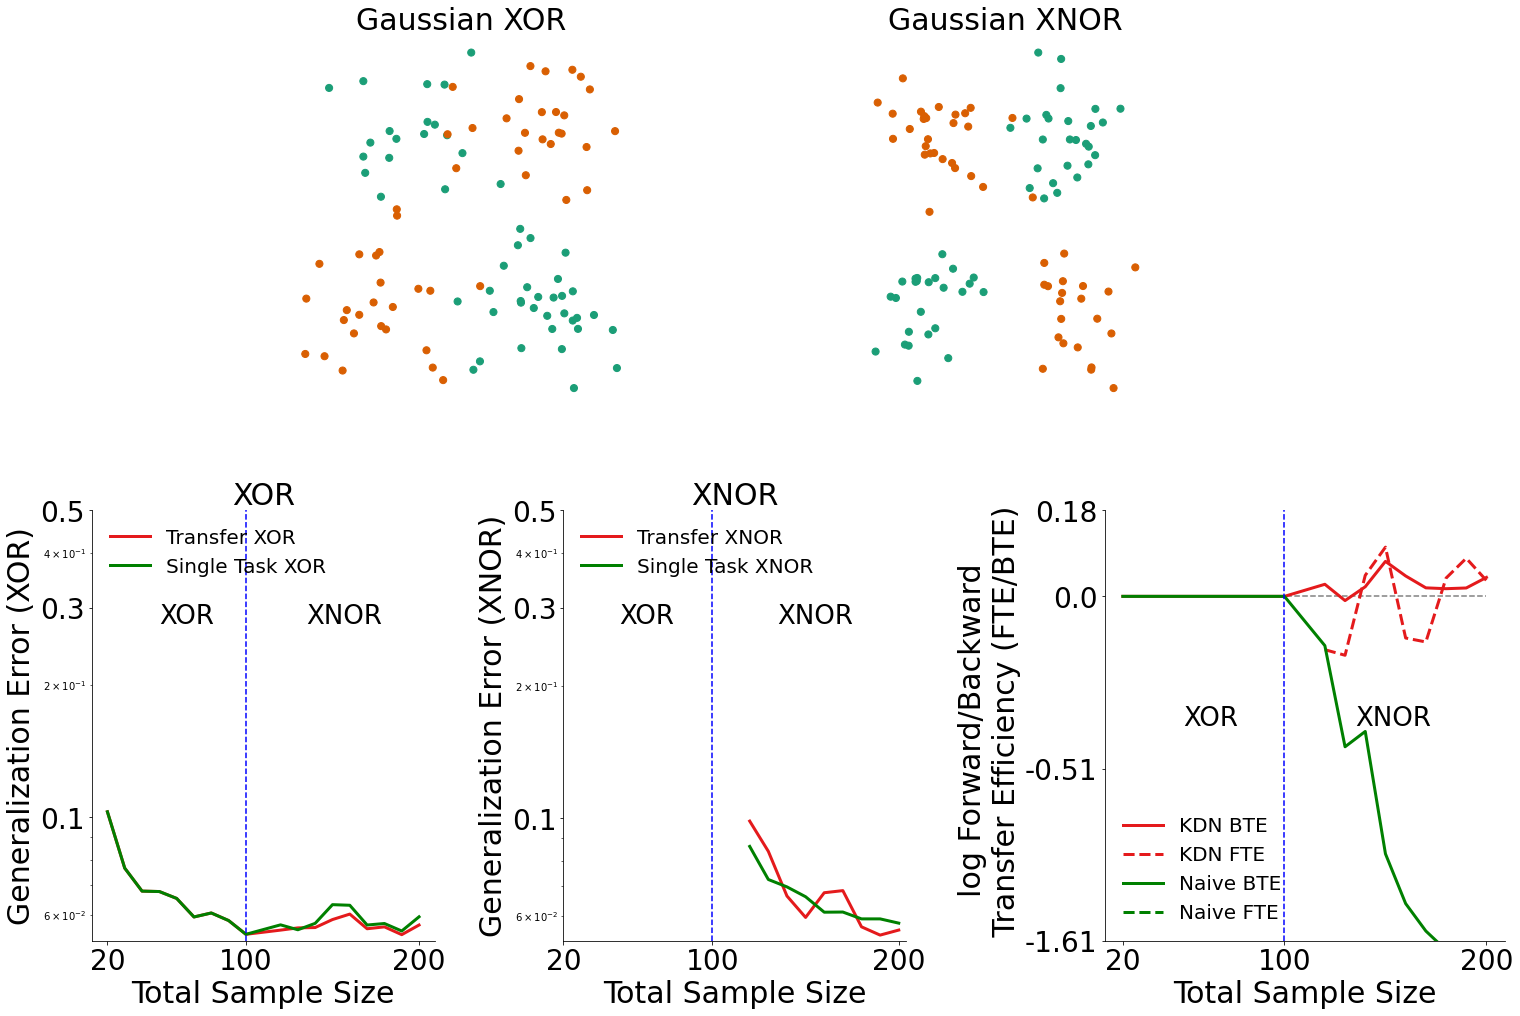

In [ ]:
# plot data
data = np.load(f'/content/gdrive/My Drive/kdn_proglearnfig_{task2_id}_t100.npz')
for k in data.keys():
    print(k)

n_t1 = data['task1']
n_t2 = data['task2']
mean_error = data['mean_error']
mean_te = data['mean_te']

plot_error_and_eff(n_t1, n_t2, mean_error, mean_te, "XOR", "XNOR")

### RXOR 5000 generated transfer data points

task1
task2
mean_error
mean_te


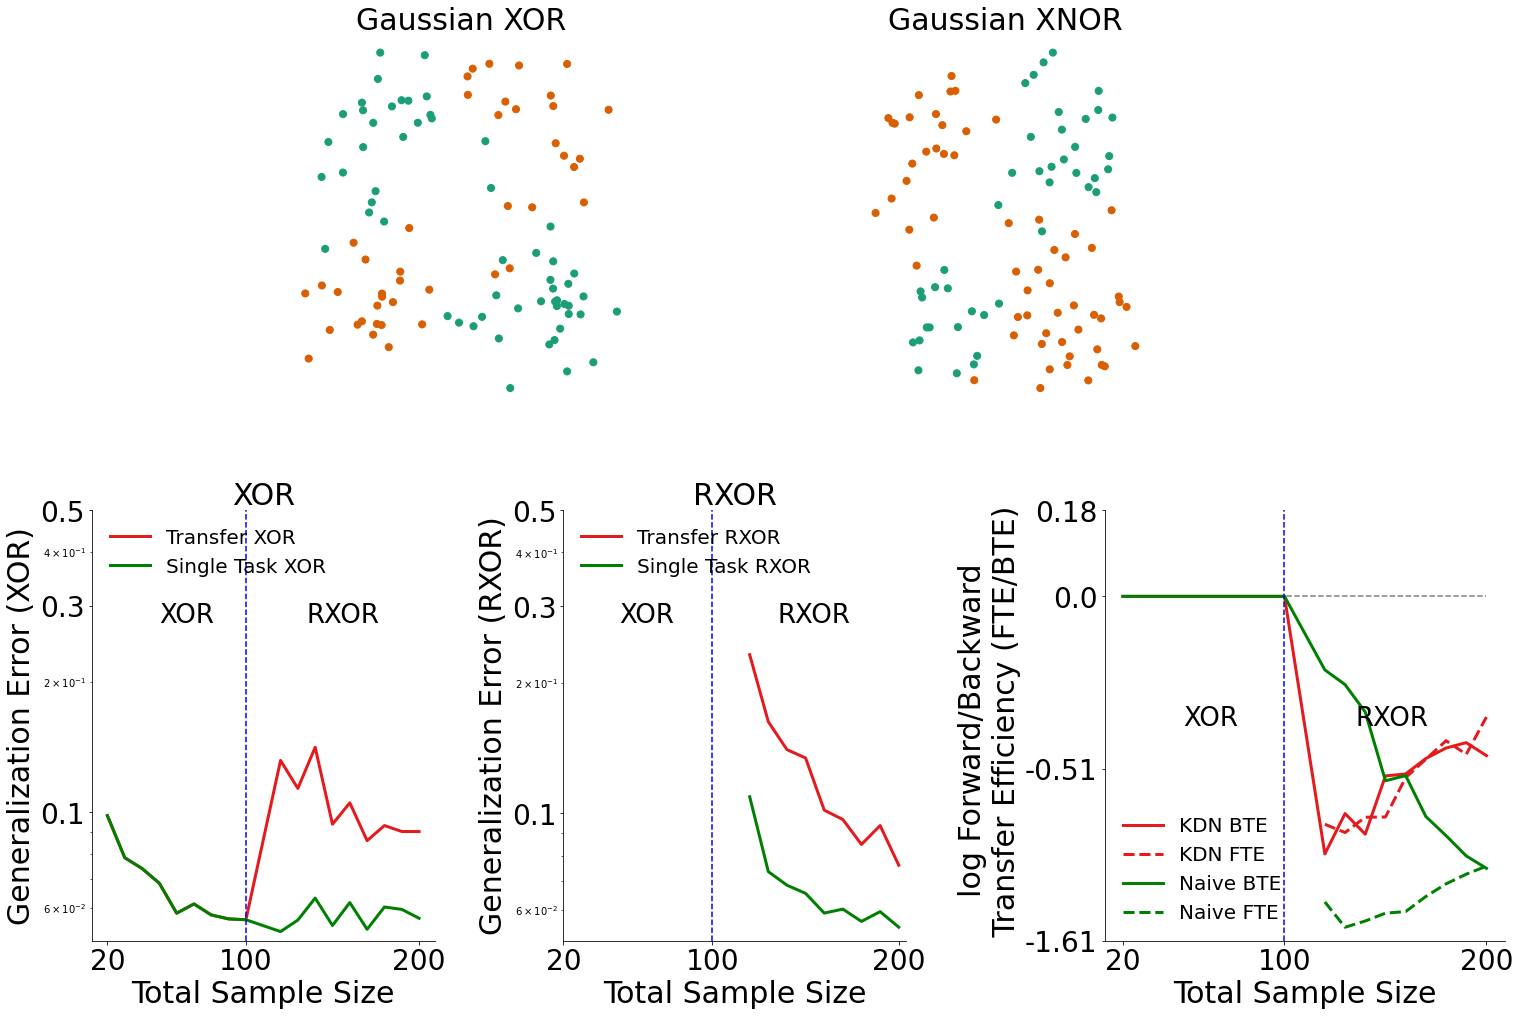

In [ ]:
task2_id = "rxor"
data = np.load(f'/content/gdrive/My Drive/kdn_proglearnfig_{task2_id}_sat.npz')
for k in data.keys():
    print(k)

n_t1 = data['task1']
n_t2 = data['task2']
mean_error = data['mean_error']
mean_te = data['mean_te']

plot_error_and_eff(n_t1, n_t2, mean_error, mean_te, "XOR", "RXOR")

### RXOR 100 generated transfer data points

task1
task2
mean_error
mean_te


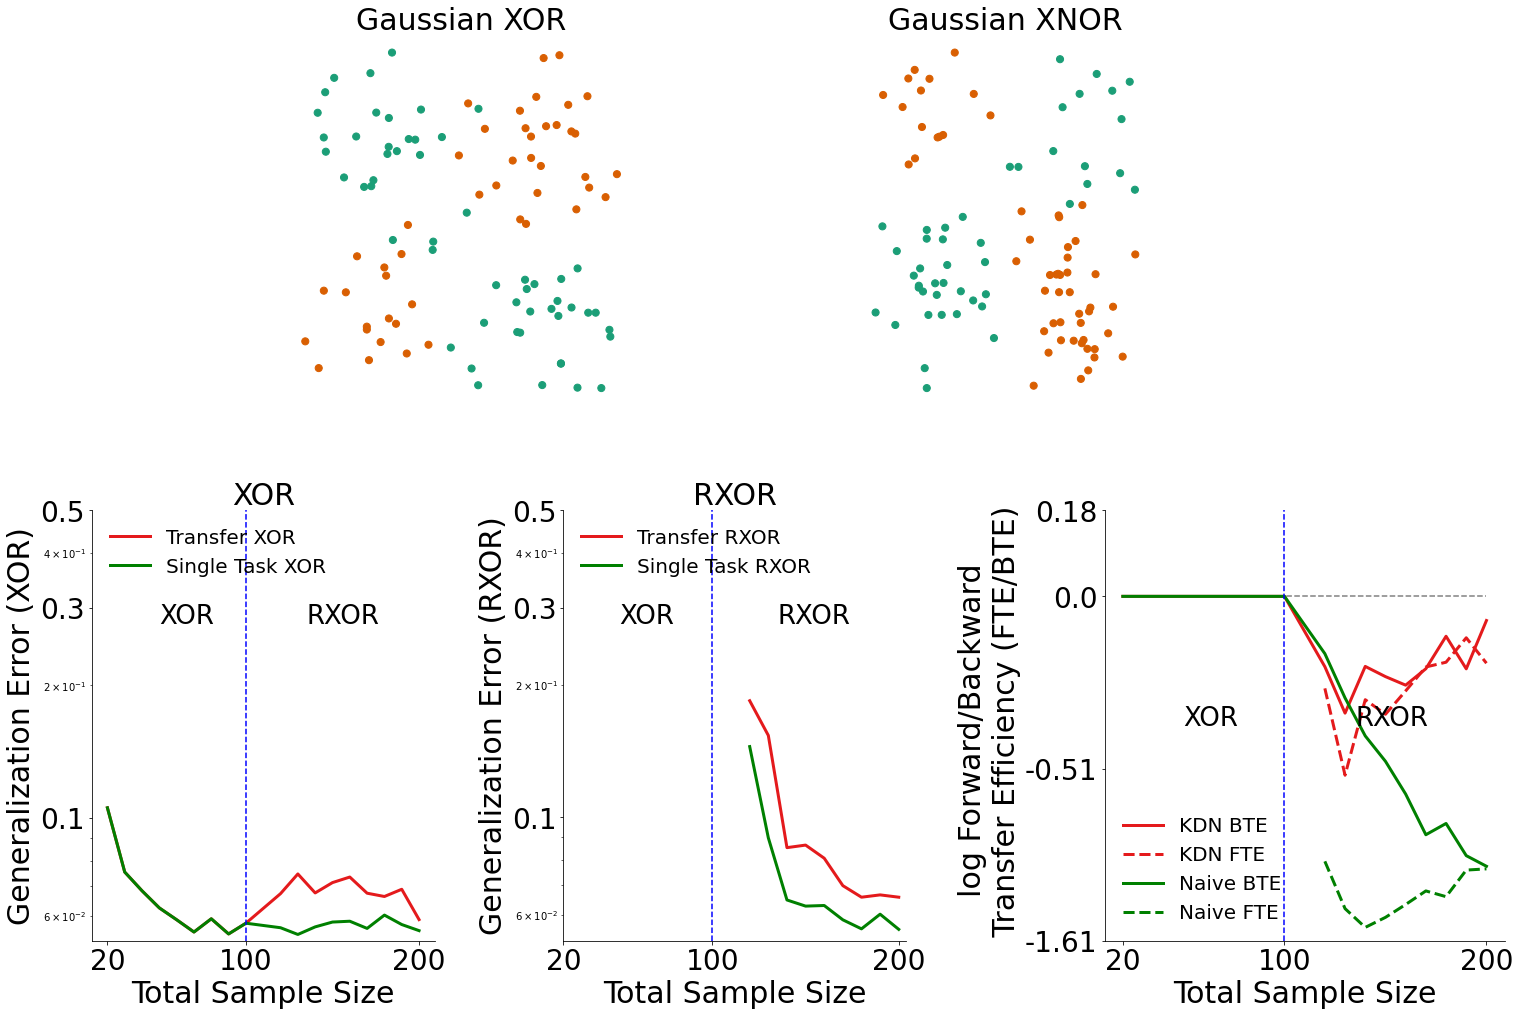

In [ ]:
task2_id = "rxor"
data = np.load(f'/content/gdrive/My Drive/kdn_proglearnfig_{task2_id}_t100.npz')
for k in data.keys():
    print(k)

n_t1 = data['task1']
n_t2 = data['task2']
mean_error = data['mean_error']
mean_te = data['mean_te']

plot_error_and_eff(n_t1, n_t2, mean_error, mean_te, "XOR", "RXOR")